In [1]:
import pandas as pd
import numpy as np
import sklearn

In [274]:
#Importing Training Dataset
data = pd.read_csv("C:/Users/PIYUSH/Documents/Competitions/Analyze This 2017/Training_Dataset.csv") 
data_dict = pd.read_csv("C:/Users/PIYUSH/Documents/Competitions/Analyze This 2017/Data_Dictionary.csv")

In [275]:
#Replacing Column Names
new_col_names = data_dict['Description']

In [276]:
data.columns = new_col_names

In [5]:
data.head()

Description,Unique customer identifier,Card product type,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,...,Number of times the customer was extended credit card offers in the last year,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year,Number of times the customer accepted credit card offers in the last year,Indicator for extension of Supp card offer,Indicator for extension of Elite card offer,Indicator for extension of Credit card offer,Indicator for acceptance of Supp card offer,Indicator for acceptance of Elite card offer,Indicator for acceptance of Credit card offer
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [277]:
y = data.values[:, -3:]

In [278]:
val = []

for i in y:
    if (i[0] == 0 and i[1] == 0 and i[2] == 0):
        val.append(0)
    elif(i[0] == 1):
        val.append(1)
    elif(i[1] == 1):
        val.append(2)
    elif(i[2] == 1):
        val.append(3)

data['indicator of card type offered'] = val

In [279]:
#Dropping the column Card product Type as all are charge
data.drop(data.columns[1], axis = 1, inplace = True)

In [280]:
#Column industryCode_unique is categorical with 18 levels which will be converted into numerical 18 levels
industryCode_unique = list(data['Industry code in which the customer has spent the most in past. (Including estimated external).'].unique())

In [10]:
industryCode_unique

['Office supplies    ',
 'Unknown            ',
 'Misc services      ',
 'Social services    ',
 'Manufacturing      ',
 'Entertainment      ',
 'Construction       ',
 'Apparel',
 'Finance            ',
 'Automotive         ',
 'Personal services  ',
 'Consumables        ',
 'Household          ',
 'Transport          ',
 'Non durable goods  ',
 'Durable goods      ',
 'Produce            ',
 'Mining             ']

In [281]:
range_of_classes = range(0, 18)
map_values_dic   = {}

for n in range_of_classes:
    map_values_dic[industryCode_unique[n]] = n

data['Industry code in which the customer has spent the most in past. (Including estimated external).'] = data['Industry code in which the customer has spent the most in past. (Including estimated external).'].map(map_values_dic)

In [282]:
data['Industry code in which the customer has spent the most in past. (Including estimated external).'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [13]:
#########One hot encoding of the same can also be used for column industry_code########

#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

In [14]:
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(data['Industry code in which the customer has spent the most in past. (Including estimated external).'])

In [15]:
#onehot_encoder = OneHotEncoder(sparse = False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [16]:
#industry_col = data.columns.get_loc('Industry code in which the customer has spent the most in past. (Including estimated external).')

In [17]:
#industryCode_unique = list(data['Industry code in which the customer has spent the most in past. (Including estimated external).'].unique())

In [18]:
#industryCode_unique.sort()

In [19]:
#for i in range(0,len(industryCode_unique)):
#    data.insert(i+1+industry_col, industryCode_unique[i], onehot_encoded[:,i])

In [20]:
#data.drop(data.columns[industry_col], axis = 1, inplace = True)

In [21]:
data.columns

Index([u'Unique customer identifier', u'Family Size',
       u'Customer spending capacity. 0 = No data available',
       u'Number of total cards (including estimated external) active in the last yaer',
       u'Number of months the Account has been set up.',
       u'Total club memberhship fees in the last one year',
       u'Internal score for affinity towards high spend',
       u'Internal influencer score', u'Income. 0 = No data available',
       u'Platinum card indicator',
       u'Internal probability score for affinity towards busniess expenditure',
       u'Industry code in which the customer has spent the most in past. (Including estimated external).',
       u'Number of times the customer has made payments against the card in the last 1 year',
       u'Number of club memberships', u'Number of air miles memberships',
       u'Electronics related spend in quarter 1',
       u'Electronics related spend in quarter 2',
       u'Electronics related spend in quarter 3',
       u'El

In [22]:
######Customer Spending Capacity has 75% N/A(i.e 0 here) so it can be safely negleged######
######Or this column can be filled with avg values of other customers#######

#data['Customer spending capacity. 0 = No data available'].replace(0, np.nan, inplace = True)

In [23]:
#data['Customer spending capacity. 0 = No data available'].fillna(data['Customer spending capacity. 0 = No data available'].mean(skipna = True), inplace = True)

In [24]:
##### Income has some N/A value which is filled with mean income of other customers#######
data['Income. 0 = No data available'].replace(0, np.nan, inplace = True)

In [25]:
data['Income. 0 = No data available'].fillna(data['Income. 0 = No data available'].mean(skipna = True), inplace = True)

In [58]:
data['Income. 0 = No data available'] = np.log(data['Income. 0 = No data available'])

In [26]:
#######Income can be also divided into different bins######

#bins = [0, 60000, 100000, 160000, 1000000, 35000000]
#group_names = ['inc_lowest','inc_low','inc_mid','inc_high','inc_highest']
#income_group = pd.cut(data['Income. 0 = No data available'], bins, right = False, labels = group_names)

In [27]:
#data.insert(8, 'income_group', income_group)

In [28]:
#dummy = pd.get_dummies(data['income_group'])

In [29]:
#data.drop(data.columns[8], axis = 1, inplace = True)

In [30]:
#for i in range(0, len(dummy.columns)):
    #data.insert(i+8, dummy.columns[i], dummy.iloc[:, i])

In [31]:
#data.drop(data.columns[7], axis = 1, inplace = True)

In [284]:
data[data.columns[1:45]]

Description,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,Platinum card indicator,Internal probability score for affinity towards busniess expenditure,...,Total Spend in quarter 1,Total Spend in quarter 2,Total Spend in quarter 3,Total Spend in quarter 4,Number of times the customer was extended supp offers in the last year,Number of times the customer accepted elite card offers in the last year,Number of times the customer was extended credit card offers in the last year,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year,Number of times the customer accepted credit card offers in the last year
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,208276.89,129504.66,173841.11,131011.34,0,0,0,0,0,0
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,10324.13,3666.10,21049.55,9146.66,0,0,0,0,0,0
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,55201.56,85357.68,38022.78,29979.13,0,0,0,0,0,0
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,31921.09,35437.46,23934.82,33299.45,1,0,0,1,0,0
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,125878.30,91078.15,112817.05,53185.85,0,0,0,0,0,0
5,5,0,1,127,381,0.1431,0.0000,48246,0,3.1081,...,20312.42,14660.91,13645.81,16864.47,0,0,0,0,0,0
6,1,0,3,320,490,0.1047,0.0000,2918974,0,1.6549,...,11277.92,6170.09,10332.38,3978.39,0,0,0,0,0,0
7,4,0,3,2,981,0.5128,0.4817,2259153,1,2.0123,...,97489.09,30364.28,34794.77,41782.27,1,0,0,1,0,0
8,1,25126,0,129,490,0.0266,0.2682,72102,0,2.0944,...,5211.24,1594.91,1077.98,1109.82,1,0,0,0,0,0
9,3,0,3,131,207,2.0450,0.5365,2521045,0,6.2783,...,251749.62,193770.42,170318.60,172382.96,0,0,0,0,0,0


In [33]:
##### Calculating correlation between the features #####
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
corr = data[data.columns[1:44]].corr()
corr

Description,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,Platinum card indicator,Internal probability score for affinity towards busniess expenditure,...,Retail spend in quarter 4,Total Spend in quarter 1,Total Spend in quarter 2,Total Spend in quarter 3,Total Spend in quarter 4,Number of times the customer was extended supp offers in the last year,Number of times the customer accepted elite card offers in the last year,Number of times the customer was extended credit card offers in the last year,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year
Description,,,,,,,,,,,,,,,,,,,,,
Family Size,1.000000,0.042283,-0.025627,0.074835,0.339898,0.409975,0.218697,0.182079,0.121889,0.347493,...,0.108197,0.188373,0.186558,0.199711,0.115083,0.206618,0.002256,0.013773,0.306366,0.010348
Customer spending capacity. 0 = No data available,0.042283,1.000000,0.178655,-0.049211,0.174766,0.117422,0.076328,0.033491,0.054338,0.087193,...,0.020599,0.047835,0.049609,0.049668,0.044176,-0.001728,0.005586,0.027290,0.009824,0.007900
Number of total cards (including estimated external) active in the last yaer,-0.025627,0.178655,1.000000,-0.133936,-0.021197,-0.033905,-0.028295,-0.012011,-0.010960,-0.057284,...,-0.007953,-0.013304,-0.014021,-0.014360,-0.006242,0.003212,0.005712,-0.029483,-0.002850,0.013287
Number of months the Account has been set up.,0.074835,-0.049211,-0.133936,1.000000,0.139655,0.004689,0.200997,0.099842,0.056575,-0.005586,...,0.001531,-0.007271,-0.001967,0.004892,0.001404,-0.029581,-0.001683,0.037072,-0.019328,-0.032543
Total club memberhship fees in the last one year,0.339898,0.174766,-0.021197,0.139655,1.000000,0.414449,0.221215,0.160044,0.543039,0.299894,...,0.101840,0.176998,0.164085,0.191319,0.116058,0.141861,-0.030136,0.060136,0.136436,0.012642
Internal score for affinity towards high spend,0.409975,0.117422,-0.033905,0.004689,0.414449,1.000000,0.183572,0.181925,0.193328,0.420752,...,0.170535,0.401062,0.373332,0.397327,0.228688,0.162277,0.008080,0.012951,0.179889,0.009839
Internal influencer score,0.218697,0.076328,-0.028295,0.200997,0.221215,0.183572,1.000000,0.378968,0.135265,0.234107,...,0.051100,0.089185,0.082856,0.099370,0.046068,0.012397,-0.017898,0.015281,0.054339,-0.005087
Income. 0 = No data available,0.182079,0.033491,-0.012011,0.099842,0.160044,0.181925,0.378968,1.000000,0.079536,0.106580,...,0.051904,0.083583,0.076369,0.093937,0.048246,0.054947,-0.007970,0.000936,0.066403,-0.006908
Platinum card indicator,0.121889,0.054338,-0.010960,0.056575,0.543039,0.193328,0.135265,0.079536,1.000000,0.160583,...,0.023869,0.063288,0.054577,0.067487,0.030346,0.135661,-0.002044,0.049784,0.084280,0.138097


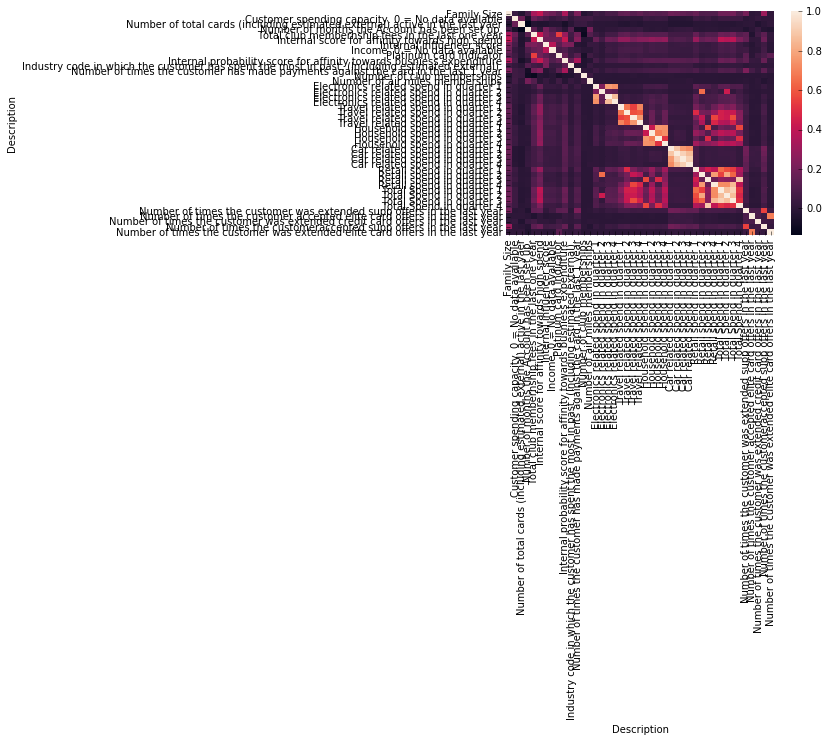

In [35]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

In [36]:
##### Pairs which have correlation greated then 0.5 #####
for row in corr.columns:
    for col in corr.columns:
        if np.abs(corr[row][col]) > 0.5:
            if row is not col:
                print(row, col)

('Total club memberhship fees in the last one year', 'Platinum card indicator')
('Platinum card indicator', 'Total club memberhship fees in the last one year')
('Electronics related spend in quarter 1', 'Electronics related spend in quarter 3')
('Electronics related spend in quarter 1', 'Electronics related spend in quarter 4')
('Electronics related spend in quarter 2', 'Retail spend in quarter 2')
('Electronics related spend in quarter 3', 'Electronics related spend in quarter 1')
('Electronics related spend in quarter 3', 'Electronics related spend in quarter 4')
('Electronics related spend in quarter 4', 'Electronics related spend in quarter 1')
('Electronics related spend in quarter 4', 'Electronics related spend in quarter 3')
('Travel related spend in quarter 1', 'Travel related spend in quarter 2')
('Travel related spend in quarter 1', 'Travel related spend in quarter 3')
('Travel related spend in quarter 1', 'Travel related spend in quarter 4')
('Travel related spend in quarter

In [37]:
###### Expenditure in different quarter are correlated so they are reduced with columns mean and standared deviation #####

In [38]:
electric_q1_col = data.columns.get_loc('Electronics related spend in quarter 1')
total_q4_col = data.columns.get_loc('Total Spend in quarter 4')

In [39]:
for i, j in zip(range(0,28,4), range(0,6)):
    data.insert(total_q4_col+2*j+1, 'mean_{}'.format(j), data[data.columns[electric_q1_col+i:electric_q1_col+4+i]].mean(axis=1))
    data.insert(total_q4_col+2*j+2,'std_{}'.format(j), data[data.columns[electric_q1_col+i:electric_q1_col+4+i]].std(axis = 1))

In [40]:
data.columns

Index([u'Unique customer identifier', u'Family Size',
       u'Customer spending capacity. 0 = No data available',
       u'Number of total cards (including estimated external) active in the last yaer',
       u'Number of months the Account has been set up.',
       u'Total club memberhship fees in the last one year',
       u'Internal score for affinity towards high spend',
       u'Internal influencer score', u'Income. 0 = No data available',
       u'Platinum card indicator',
       u'Internal probability score for affinity towards busniess expenditure',
       u'Industry code in which the customer has spent the most in past. (Including estimated external).',
       u'Number of times the customer has made payments against the card in the last 1 year',
       u'Number of club memberships', u'Number of air miles memberships',
       u'Electronics related spend in quarter 1',
       u'Electronics related spend in quarter 2',
       u'Electronics related spend in quarter 3',
       u'El

In [41]:
###### Dropping original columns of quaterly expenditure in different segment #####
data.drop(data[data.columns[electric_q1_col:electric_q1_col+24]], axis = 1, inplace = True)

In [42]:
data.columns

Index([u'Unique customer identifier', u'Family Size',
       u'Customer spending capacity. 0 = No data available',
       u'Number of total cards (including estimated external) active in the last yaer',
       u'Number of months the Account has been set up.',
       u'Total club memberhship fees in the last one year',
       u'Internal score for affinity towards high spend',
       u'Internal influencer score', u'Income. 0 = No data available',
       u'Platinum card indicator',
       u'Internal probability score for affinity towards busniess expenditure',
       u'Industry code in which the customer has spent the most in past. (Including estimated external).',
       u'Number of times the customer has made payments against the card in the last 1 year',
       u'Number of club memberships', u'Number of air miles memberships',
       u'mean_0', u'std_0', u'mean_1', u'std_1', u'mean_2', u'std_2',
       u'mean_3', u'std_3', u'mean_4', u'std_4', u'mean_5', u'std_5',
       u'Number of ti

In [43]:
data.head()

Description,Unique customer identifier,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,Platinum card indicator,...,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year,Number of times the customer accepted credit card offers in the last year,Indicator for extension of Supp card offer,Indicator for extension of Elite card offer,Indicator for extension of Credit card offer,Indicator for acceptance of Supp card offer,Indicator for acceptance of Elite card offer,Indicator for acceptance of Credit card offer,indicator of card type offered
0,1,0,106920,4,18,970,0.7969,0.1831,337236.0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,2,0,4,19,1030,0.0678,0.0000,2918974.0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,2,399168,4,35,327,0.7551,0.2986,498656.0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,267300,4,274,1258,0.7969,0.5297,2480074.0,1,...,1,0,0,0,0,1,0,0,1,3
4,5,0,213840,6,1,0,2.3238,0.0000,2918974.0,0,...,0,0,0,1,0,0,1,0,0,1


In [44]:
###### After pre-processing data, we can apply different model of multiclass classsification to predict different card to offered ######

In [45]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics

C:\Users\PIYUSH\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [272]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data[data.columns[1:33]], data[data.columns[39]], test_size = 0.3, random_state = 111)

In [61]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [62]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [63]:
for i in range(1000,2000, 200):
    classifier = linear_model.LogisticRegression(C = i)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print(metrics.accuracy_score(y_test, predicted))

0.773916666667
0.774333333333
0.77425
0.774
0.774166666667


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
for i in range(100,1000,100):
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
    predicted_rf = clf.predict(X_test)
    print(metrics.accuracy_score(y_test, predicted_rf))

0.775
0.775416666667
0.775333333333
0.77525
0.775166666667
0.77525
0.77525
0.77575
0.77575


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [168]:
X = data[data.columns[1:33]]
y = data[data.columns[39:]]

In [54]:
kfold = model_selection.KFold(n_splits = 3, random_state = 10)
for i in range(100, 2000, 500):
    model = AdaBoostClassifier(n_estimators = i, random_state = 10)
    results = model_selection.cross_val_score(model, X, y, cv = kfold)
    print(results.mean())

0.766524945335
0.704325149002
0.666925008958
0.638500346414


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [273]:
for i in range(500, 1500, 100):
    clf_gbc = GradientBoostingClassifier(n_estimators = i)
    clf_gbc.fit(X_train, y_train)
    #predicted_gbc = clf_gbc.predict(X_test)
    #print(metrics.accuracy_score(y_test, predicted_gbc))
    print(clf_gbc.score(X_test, y_test))

0.772
0.771083333333


KeyboardInterrupt: 

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
for i in range(100, 1000, 100):
    clf_etc = ExtraTreesClassifier(n_estimators=i)
    clf_etc.fit(X_train, y_train)
    predicted_etc = clf_etc.predict(X_test)
    print(metrics.accuracy_score(y_test,predicted_etc))

0.77425
0.775166666667
0.774666666667
0.775166666667
0.774833333333
0.775166666667
0.775
0.774583333333
0.7745


In [83]:
##### Stacking three models RandomForestClassifier, GradientBoostingClassifier and ExtraTreesClassifier ####
from sklearn.cross_validation import StratifiedKFold

In [84]:
verbose = True

In [85]:
n_folds = 3

In [251]:
skf = list(StratifiedKFold(data.iloc[:,39], n_folds))

In [252]:
clfs = [RandomForestClassifier(n_estimators = 1000), GradientBoostingClassifier(n_estimators = 2000), ExtraTreesClassifier(n_estimators = 200)]

In [253]:
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))

In [254]:
for j, clf in enumerate(clfs):
    print j, clf
    for i, (train, test) in enumerate(skf):
        print "Fold", i
        X_train = X.iloc[train,:]
        y_train = y.iloc[train,:]
        X_test = X.iloc[test,:]
        y_test = y.iloc[test,:]
        clf.fit(X_train, y_train)
        y_submission = clf.predict(X_test)
        dataset_blend_train[test, j] = y_submission

0 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Fold 0


C:\Users\PIYUSH\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Fold 1
Fold 2
1 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
2 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2


In [255]:
clf_gbc = GradientBoostingClassifier(n_estimators = 1000)

In [256]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(dataset_blend_train[:,0:], data[data.columns[39]], test_size = 0.3, random_state = 111)

In [258]:
clf_gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [260]:
predicted_stack = clf_gbc.predict(X_test)

In [261]:
metrics.accuracy_score(y_test,predicted_stack)

0.77516666666666667

In [225]:
##### Applying the stacked model on Leaderboard Dataset #####
dfl = pd.read_csv("C:/Users/PIYUSH/Documents/Competitions/Analyze This 2017/Leaderboard_Dataset.csv")

In [230]:
dfl.columns = new_col_names[0:46]

In [232]:
industryCode_unique = list(dfl['Industry code in which the customer has spent the most in past. (Including estimated external).'].unique())
range_of_classes = range(0, 18)
map_values_dic   = {}

for n in range_of_classes:
    map_values_dic[industryCode_unique[n]] = n

dfl['Industry code in which the customer has spent the most in past. (Including estimated external).'] = dfl['Industry code in which the customer has spent the most in past. (Including estimated external).'].map(map_values_dic)

In [233]:
dfl.drop(dfl.columns[1], axis = 1, inplace = True)

In [ ]:
#integer_encoded_l = label_encoder.fit_transform(dfl[dfl.columns[10]])
#integer_encoded_l = integer_encoded_l.reshape(len(integer_encoded_l), 1)
#onehot_encoded_l = onehot_encoder.fit_transform(integer_encoded_l)

In [ ]:
#industryCode_unique_l = list(dfl[dfl.columns[10]].unique())
#industryCode_unique_l.sort()
#for i in range(0,len(industryCode_unique_l)):
#    dfl.insert(i+11, industryCode_unique_l[i], onehot_encoded_l[:,i])

In [ ]:
#dfl.drop(dfl.columns[10], axis = 1, inplace = True)

In [234]:
dfl.head()

Description,Unique customer identifier,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,Platinum card indicator,...,Total Spend in quarter 1,Total Spend in quarter 2,Total Spend in quarter 3,Total Spend in quarter 4,Number of times the customer was extended supp offers in the last year,Number of times the customer accepted elite card offers in the last year,Number of times the customer was extended credit card offers in the last year,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year,Number of times the customer accepted credit card offers in the last year
0,50001,2,0,4,18,460,0.2495,0.2310,180512,0,...,32886.89,11345.47,7914.21,7704.62,0,0,0,0,0,0
1,50002,2,0,0,45,381,1.9329,0.7196,11295211,0,...,104722.52,255544.59,116216.40,152673.00,1,0,0,0,0,0
2,50003,0,0,4,3,0,0.7969,0.0000,45161,0,...,19689.03,0.00,0.00,0.00,0,0,0,0,0,0
3,50004,1,18711,9,89,432,0.1016,0.5074,420972,0,...,13154.43,7671.62,3357.24,2651.22,0,1,0,0,0,0
4,50005,0,21384,4,7,0,0.7969,0.2310,880618,0,...,32071.78,15376.01,14390.97,0.00,0,0,0,0,0,0


In [ ]:
#dfl['Customer spending capacity. 0 = No data available'].replace(0, np.nan, inplace = True)

In [ ]:
#dfl['Customer spending capacity. 0 = No data available'].fillna(dfl['Customer spending capacity. 0 = No data available'].mean(skipna = True), inplace = True)

In [235]:
dfl['Income. 0 = No data available'].replace(0, np.nan, inplace = True)

In [236]:
dfl['Income. 0 = No data available'].fillna(dfl['Income. 0 = No data available'].mean(skipna = True), inplace = True)

In [237]:
dfl['Income. 0 = No data available'] = np.log(dfl['Income. 0 = No data available'])

In [ ]:
#bins = [0, 60000, 100000, 160000, 1000000, 35000000]
#group_names = ['inc_lowest','inc_low','inc_mid','inc_high','inc_highest']
#income_group = pd.cut(dfl['Income. 0 = No data available'], bins, right = False, labels = group_names)

In [ ]:
#dfl.insert(8, 'income_group', income_group)

In [ ]:
#dummy = pd.get_dummies(dfl['income_group'])
#dfl.drop(dfl.columns[8], axis = 1, inplace = True)

In [ ]:
#for i in range(0, len(dummy.columns)):
#    dfl.insert(i+8, dummy.columns[i], dummy.iloc[:, i])

In [ ]:
#dfl.drop(dfl.columns[7], axis = 1, inplace = True)

In [238]:
electric_q1_col = dfl.columns.get_loc('Electronics related spend in quarter 1')
total_q4_col = dfl.columns.get_loc('Total Spend in quarter 4')
for i, j in zip(range(0,28,4), range(0,6)):
    dfl.insert(total_q4_col+2*j+1, 'mean_{}'.format(j), dfl[dfl.columns[electric_q1_col+i:electric_q1_col+4+i]].mean(axis=1))
    dfl.insert(total_q4_col+2*j+2,'std_{}'.format(j), dfl[dfl.columns[electric_q1_col+i:electric_q1_col+4+i]].std(axis = 1))

###### Dropping original columns of quaterly expenditure in different segment #####
dfl.drop(dfl[dfl.columns[electric_q1_col:electric_q1_col+24]], axis = 1, inplace = True)

In [239]:
dfl.head()

Description,Unique customer identifier,Family Size,Customer spending capacity. 0 = No data available,Number of total cards (including estimated external) active in the last yaer,Number of months the Account has been set up.,Total club memberhship fees in the last one year,Internal score for affinity towards high spend,Internal influencer score,Income. 0 = No data available,Platinum card indicator,...,mean_4,std_4,mean_5,std_5,Number of times the customer was extended supp offers in the last year,Number of times the customer accepted elite card offers in the last year,Number of times the customer was extended credit card offers in the last year,Number of times the customeraccepted supp offers in the last year,Number of times the customer was extended elite card offers in the last year,Number of times the customer accepted credit card offers in the last year
0,50001,2,0,4,18,460,0.2495,0.2310,12.103553,0,...,14495.0075,6174.142602,14962.7975,12065.403385,0,0,0,0,0,0
1,50002,2,0,0,45,381,1.9329,0.7196,16.239889,0,...,136374.0700,41725.216257,157289.1275,68618.903403,1,0,0,0,0,0
2,50003,0,0,4,3,0,0.7969,0.0000,10.717989,0,...,3289.8525,6579.705000,4922.2575,9844.515000,0,0,0,0,0,0
3,50004,1,18711,9,89,432,0.1016,0.5074,12.950322,0,...,4941.3475,1177.500896,6708.6275,4836.323611,0,1,0,0,0,0
4,50005,0,21384,4,7,0,0.7969,0.2310,13.688379,0,...,0.0000,0.000000,15459.6900,13116.309362,0,0,0,0,0,0


In [262]:
Xl_train = dfl[dfl.columns[1:33]]

In [263]:
skf_l = list(StratifiedKFold(dfl.iloc[:,1], n_folds))

In [264]:
dataset_blend_train_l = np.zeros((Xl_train.shape[0], len(clfs)))

In [265]:
for j, clf in enumerate(clfs):
    print j, clf
    for i, (train, test) in enumerate(skf_l):
        print "Fold", i
        X_train = Xl_train.iloc[train,:]
        X_test = Xl_train.iloc[test,:]
        y_submission = clf.predict(X_test)
        dataset_blend_train_l[test, j] = y_submission

0 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
1 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
2 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_node

In [267]:
predicted_prob = clf_gbc.predict_proba(dataset_blend_train_l)

In [268]:
#### Predicting the probability of classes i.e Supp, Elite, Credit or no card which can be sorted from high to low to know the priorty order in which customers will be offered cards #####
stack_3 = pd.DataFrame(predicted_prob)

In [269]:
stack_3.to_csv("C:/Users/PIYUSH/Documents/Competitions/Analyze This 2017/stack_3.csv")